# Analysis of earnings, unemployment rate and women share in major degrees

The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

In this analysis we'll try to answer the next questions:
- Do the students in more popular majors earn more money or have a lower unemployment rate?
- Is the unemployment rate higher in popular majors for women?
- What are the distributions of men share, earnings and full-time employments among majors?
- Which are the majors with a higher unemployment rate?
- There is a clear problem if we compare the earnings of a women and a men that have the same majors (and work experience). Men earns about 13% more for the same jobs in average on [OECD countries](https://www.oecd.org/els/LMF_1_5_Gender_pay_gaps_for_full_time_workers.pdf). But is there a bigger problem we're ommitting?!

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Explore the data

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
headers = recent_grads.iloc[0]

In [3]:
print(recent_grads.head(10))

   Rank  Major_code                                      Major    Total  \
0     1        2419                      PETROLEUM ENGINEERING   2339.0   
1     2        2416             MINING AND MINERAL ENGINEERING    756.0   
2     3        2415                  METALLURGICAL ENGINEERING    856.0   
3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   1258.0   
4     5        2405                       CHEMICAL ENGINEERING  32260.0   
5     6        2418                        NUCLEAR ENGINEERING   2573.0   
6     7        6202                          ACTUARIAL SCIENCE   3777.0   
7     8        5001                 ASTRONOMY AND ASTROPHYSICS   1792.0   
8     9        2414                     MECHANICAL ENGINEERING  91227.0   
9    10        2408                     ELECTRICAL ENGINEERING  81527.0   

       Men    Women     Major_category  ShareWomen  Sample_size  Employed  \
0   2057.0    282.0        Engineering    0.120564           36      1976   
1    679.0     77.0 

In [4]:
print(recent_grads.tail(10))

     Rank  Major_code                                          Major    Total  \
163   164        6102  COMMUNICATION DISORDERS SCIENCES AND SERVICES  38279.0   
164   165        2307                      EARLY CHILDHOOD EDUCATION  37589.0   
165   166        2603                        OTHER FOREIGN LANGUAGES  11204.0   
166   167        6001                         DRAMA AND THEATER ARTS  43249.0   
167   168        3302                       COMPOSITION AND RHETORIC  18953.0   
168   169        3609                                        ZOOLOGY   8409.0   
169   170        5201                         EDUCATIONAL PSYCHOLOGY   2854.0   
170   171        5202                            CLINICAL PSYCHOLOGY   2838.0   
171   172        5203                          COUNSELING PSYCHOLOGY   4626.0   
172   173        3501                                LIBRARY SCIENCE   1098.0   

         Men    Women             Major_category  ShareWomen  Sample_size  \
163   1225.0  37054.0          

In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


### Number of majors in the dataset

In [6]:
raw_data_count = recent_grads.shape[0]
raw_data_count

173

In [7]:
recent_grads = recent_grads.dropna()

In [8]:
cleaned_data_count = recent_grads.shape[0]
cleaned_data_count

172

## Popularity of major versus salary and unemployment rate

The next plot shows the majors with a bigger sample size (i.e. more popular among students) and the median salary. Moreover, in the subsequent plot, we can compare popularity versus unemployment rate. And well, apparently the popularity doesn't have to do with the money the students can make or the possibility to secure a job.

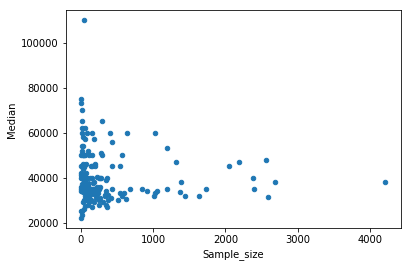

In [9]:
_ = recent_grads.plot(x='Sample_size', y='Median', kind='scatter')

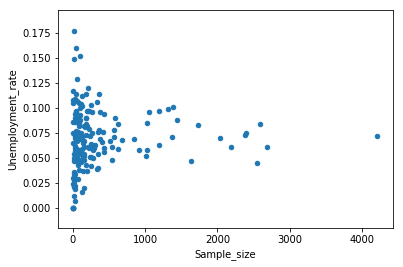

In [10]:
_ = recent_grads.plot(x='Sample_size', y='Unemployment_rate', kind='scatter')

## Salary and full-time positions

Let's see if the high salaries are because the people are working more hours, or what it is a proxy of this metric, if there are more people with full-time jobs. Spoiler: There is no relation between working more and earning more.

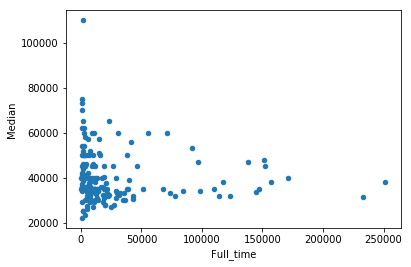

In [11]:
_ = recent_grads.plot(x='Full_time', y='Median', kind='scatter')

## Does women have a higher chance to become unemployed?

On the cell below, the plot shows on the x-axis the rate of women pursuing a major, and on the y-axis the unemployment rate. We can see that there is not a clear trend that relates the popularity of a major among women and the unemployment rate.

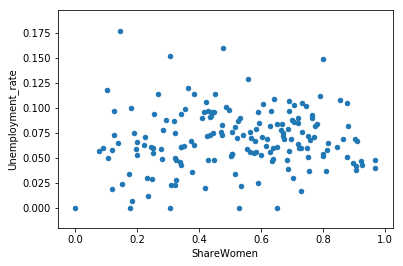

In [12]:
_ = recent_grads.plot(x='ShareWomen', y='Unemployment_rate', kind='scatter')

## Comparing salaries of mean and women

It is hard to tell from this plot (there is a cleare analysis later), but we can catch that majors with median salaries above $60,000 USD/year are more popular among men than women.

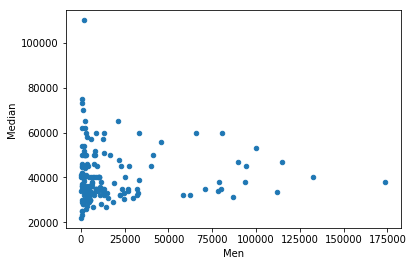

In [13]:
_ = recent_grads.plot(x='Men', y='Median', kind='scatter')

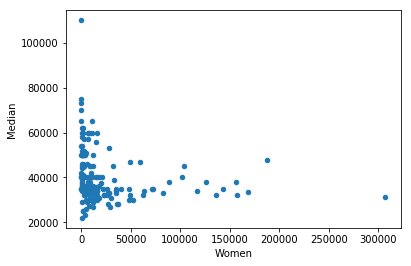

In [14]:
_ = recent_grads.plot(x='Women', y='Median', kind='scatter')

## Exploring the distributions

Here are the distributions of different metrics. The interesting part is to observe how skewed are some distributions and/or the long tails the distributions have.

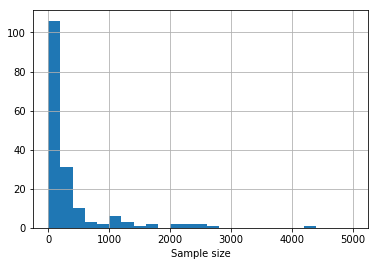

In [15]:
_ = ax = recent_grads['Sample_size'].hist(bins=25, range=(0,5000))
ax.set_xlabel('Sample size')

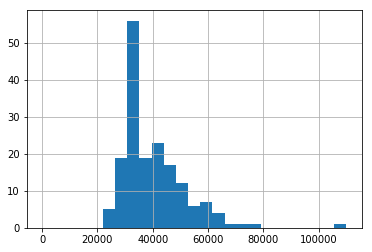

In [16]:
_ = recent_grads['Median'].hist(bins=25, range=(0,110000))
ax.set_xlabel('Median salary')

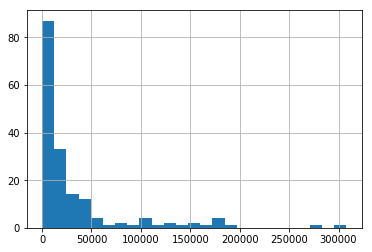

In [17]:
_ = recent_grads['Employed'].hist(bins=25, range=(0,308000))
ax.set_xlabel('Employed students')

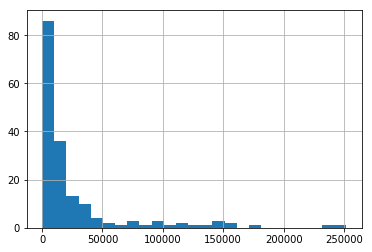

In [18]:
_ = recent_grads['Full_time'].hist(bins=25, range=(0,252000))
ax.set_xlabel('Full_time')

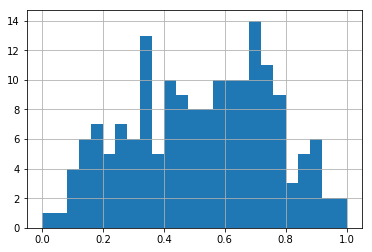

In [19]:
_ = recent_grads['ShareWomen'].hist(bins=25, range=(0,1))
ax.set_xlabel('ShareWomen')

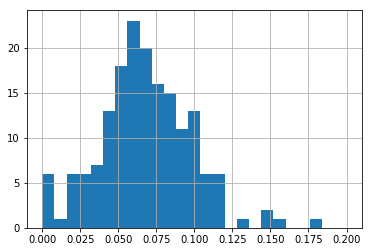

In [20]:
_ = recent_grads['Unemployment_rate'].hist(bins=25, range=(0,0.20))
ax.set_xlabel('Unemployment_rate')

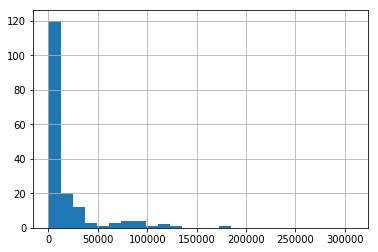

In [21]:
_ = recent_grads['Men'].hist(bins=25, range=(0,308000))
ax.set_xlabel('Men')

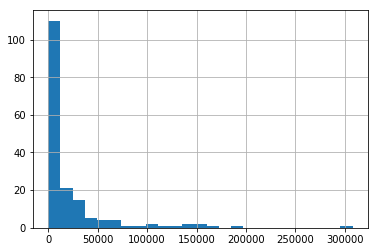

In [22]:
_ = recent_grads['Women'].hist(bins=25, range=(0,308000))
ax.set_xlabel('Women')

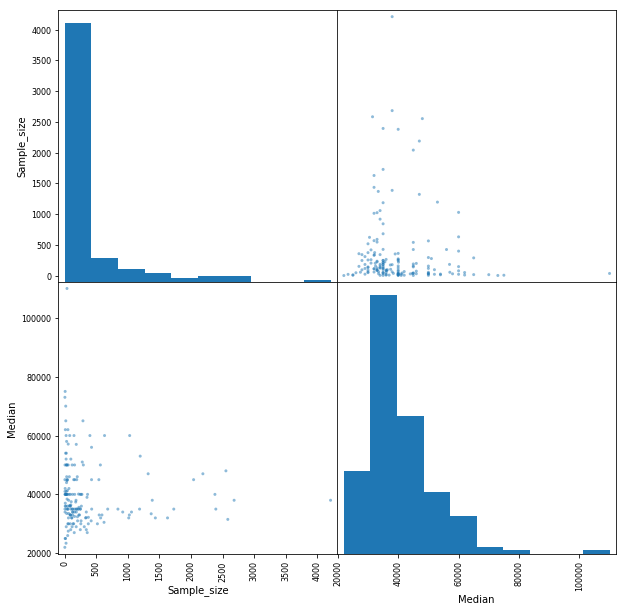

In [23]:
from pandas.plotting import scatter_matrix 

_ = scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

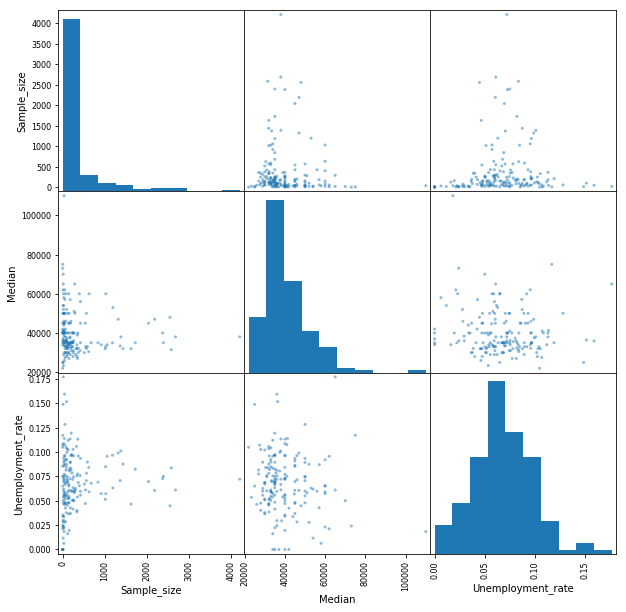

In [24]:
_ = scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(10,10))

## Is there a relation between salary and unemployment rate?

The majors are sorted based on their median salary. We could then explor if the majors with higher salary are more demanded, and thus, a lower unemploment rate. Let's see the top and bottom 10 majors.

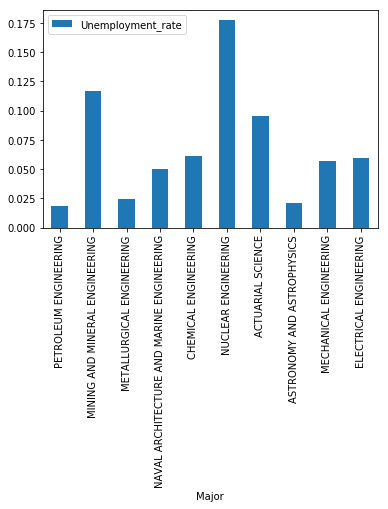

In [25]:
_ = recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')

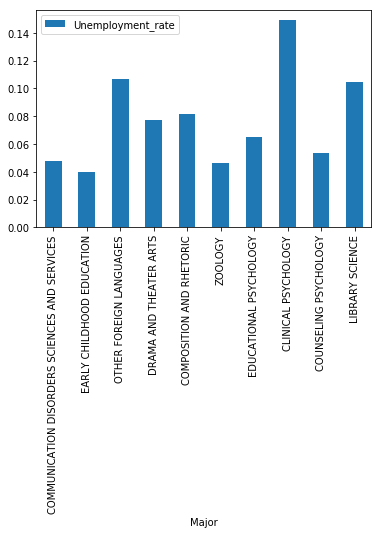

In [26]:
_ = recent_grads[-10:].plot.bar(x='Major', y='Unemployment_rate')

The results are quite diverse and not a super clear trend. Something to think about.

## Do women with a major earn less? Yes, sure. But is it only due to gender inequality?

I find the next results quite interesting. They simply show how popular are the majors with higher and lower earnings among women. You can see that the majors with the lowest earnings are extremely popular among women, and vice-versa!

(0, 1)

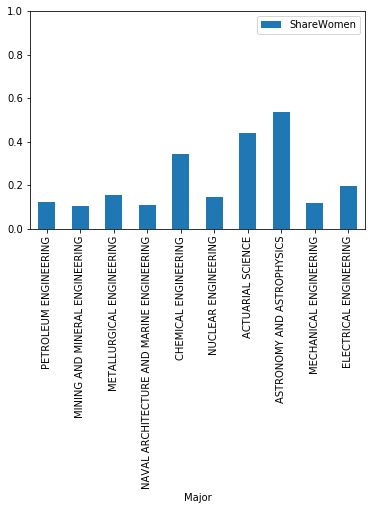

In [27]:
ax = recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
ax.set_ylim(0,1)

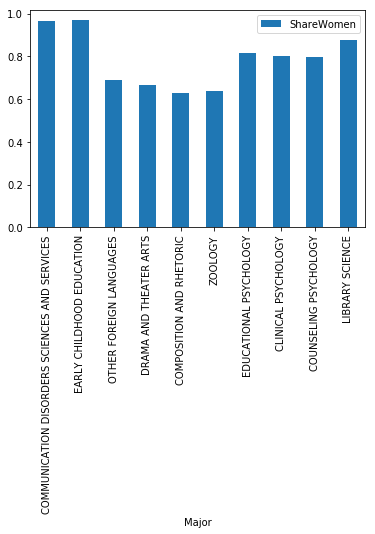

In [28]:
_ = recent_grads[-10:].plot.bar(x='Major', y='ShareWomen')

## The median salary is almost 3 times higher in the majors that only 1 in 4 women choose!

For a more accurate result, you can check by yourselves the numbers.

In [29]:
recent_grads[:10]['Median'].mean()/recent_grads[-10:]['Median'].mean()

2.7114716106604866

In [30]:
recent_grads[:10]['ShareWomen'].mean()/recent_grads[-10:]['ShareWomen'].mean()

0.28807561130827003